In [55]:
%load_ext autoreload
%autoreload 2
from math import sin, pi
import matplotlib.pyplot as plt
import random

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [56]:
def sin_regression_function(samples=720) -> tuple[list[int], list[int], list[int]]:
    X = []
    Y_class = []
    R = []
    for x in range(samples):
        result = sin(pi*x/180) 
        y = 1 if result > 0 else 0
        X.append(x)
        Y_class.append(y)
        R.append(result)
    return X, Y_class, R

def regression_function(samples=1000) -> tuple[list[int], list[int], list[int]]:
    X = []
    Y_class = []
    R = []
    for x in range(samples):
        result = 7*x + random.randint(-7*samples, 7*samples) 
        y = 1 if result > 7*x else 0
        X.append(x)
        Y_class.append(y)
        R.append(result)
    return X, Y_class, R

In [57]:
def train_test_split(X: list[int], Y: list[int], train_size=0.8):
    """
    Randomly splits the data into training and test sets.
    
    Args:
        X: List with input data
        Y: List with targets
        train_size: Proportion of data for training (between 0 and 1)
        
    Returns:
        X_train: Input data for training
        X_test: Input data for testing
        Y_train: Targets for training
        Y_test: Targets for testing
    """
    # Cria lista de índices e embaralha
    indices = list(range(len(X)))
    random.shuffle(indices)
    
    # Calcula ponto de divisão
    split_point = int(len(X) * train_size)
    
    # Separa índices de treino e teste
    train_indices = indices[:split_point]
    test_indices = indices[split_point:]
    
    # Cria conjuntos de treino
    X_train = [X[i] for i in train_indices]
    Y_train = [Y[i] for i in train_indices]
    
    # Cria conjuntos de teste
    X_test = [X[i] for i in test_indices]
    Y_test = [Y[i] for i in test_indices]

    return X_train, X_test, Y_train, Y_test

    

In [58]:
def print_function(X: list[int], Y: list[float]):
    fig, ax = plt.subplots()
    ax.scatter(X, Y, s=10)
    plt.show()

In [59]:
def print_prediction_function(X: list[int], Y: list[float], Y_predicted: list[float]):
    fig, ax = plt.subplots()
    ax.scatter(X, Y, s=100)
    ax.scatter(X, Y_predicted, color='red', marker='x', s=50, alpha=0.5, linewidths=2)
    plt.show()

In [60]:
def count_data(X: list[int]) -> tuple[int, int]:
    positive = 0
    negative = 0
    for x in X:
        if x == 1:
            positive += 1
        else:
            negative += 1
    return positive, negative

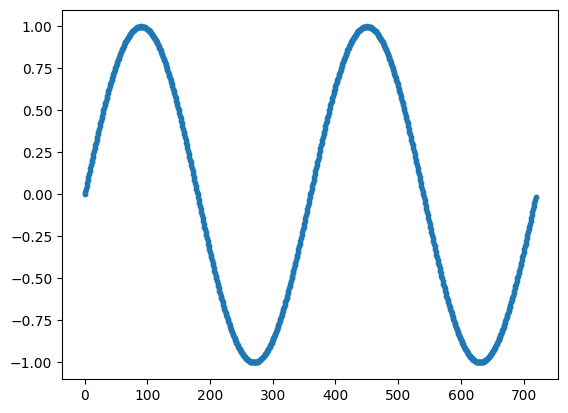

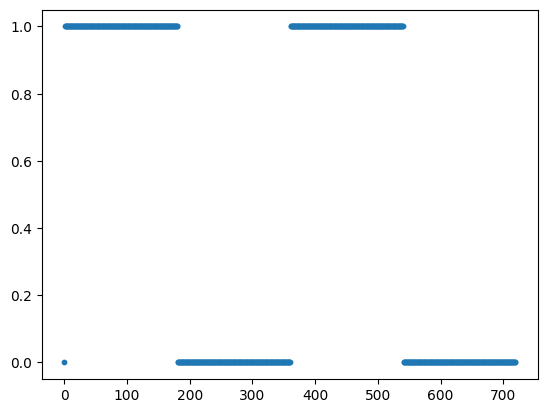

Positive target: 360
Negative target: 360


In [61]:

X, Y_class, R = sin_regression_function()
print_function(X, R)
print_function(X, Y_class)

positive_target, negative_target = count_data(Y_class)
print(f'Positive target: {positive_target}')
print(f'Negative target: {negative_target}')

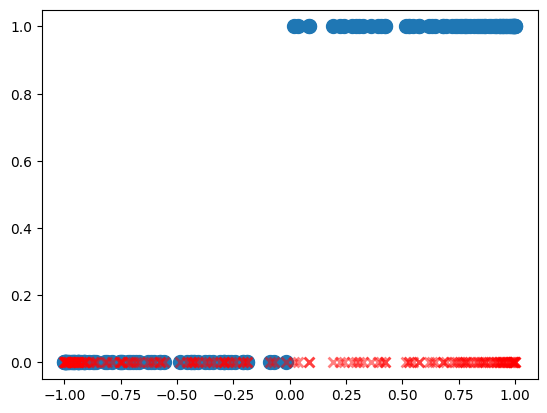

In [62]:
from perceptron.logistic_regression import NeuralNetwork

nn = NeuralNetwork()

# Separate data (80% train, 20% test)
X_train, X_test, Y_train, Y_test = train_test_split(R, Y_class, train_size=0.8)
Y_predicted = nn.predict(X_test)
print_prediction_function(X_test, Y_test, Y_predicted)

In [63]:
# Create training set in the format expected by the neural network
training_sample = [*zip(X_train, Y_train)]
learning_rate = 0.01
epochs = 1000
nn.train(training_sample, learning_rate, epochs)

Epoch: 0, Loss: 334.9627, Weight: 0.9463, Bias: -0.1490
Epoch: 100, Loss: 151.0570, Weight: 4.7024, Bias: -2.3155
Epoch: 200, Loss: 140.2921, Weight: 5.1765, Bias: -2.5682
Epoch: 300, Loss: 138.1232, Weight: 5.2824, Bias: -2.6248
Epoch: 400, Loss: 137.6115, Weight: 5.3080, Bias: -2.6385
Epoch: 500, Loss: 137.4865, Weight: 5.3143, Bias: -2.6418
Epoch: 600, Loss: 137.4557, Weight: 5.3159, Bias: -2.6427
Epoch: 700, Loss: 137.4481, Weight: 5.3162, Bias: -2.6429
Epoch: 800, Loss: 137.4462, Weight: 5.3163, Bias: -2.6429
Epoch: 900, Loss: 137.4457, Weight: 5.3164, Bias: -2.6429


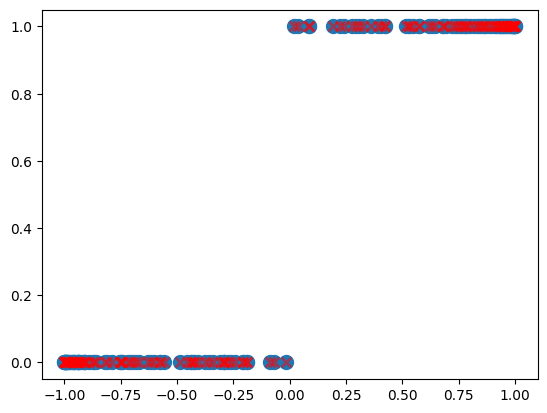

Positive train target: 290
Negative train target: 286
Positive test target: 70
Negative test target: 74
Positive predicted: 70
Negative predicted: 74


In [64]:
Y_predicted = nn.predict(X_test)
print_prediction_function(X_test, Y_test, Y_predicted)
positive_train_target, negative_train_target = count_data(Y_train)
positive_target, negative_target = count_data(Y_test)
positive_predicted, negative_predicted = count_data(Y_predicted)

print(f'Positive train target: {positive_train_target}')
print(f'Negative train target: {negative_train_target}')
print(f'Positive test target: {positive_target}')
print(f'Negative test target: {negative_target}')
print(f'Positive predicted: {positive_predicted}')
print(f'Negative predicted: {negative_predicted}')


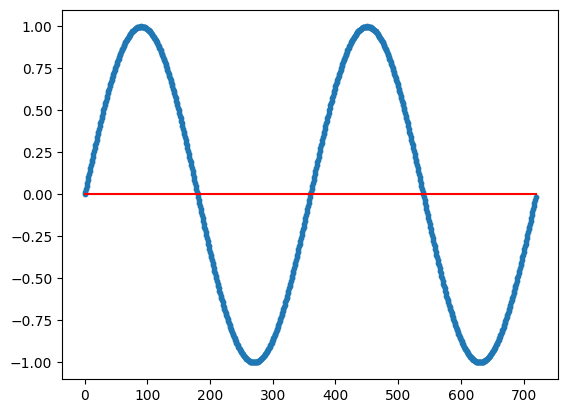

In [65]:
fig, ax = plt.subplots()
ax.scatter(X, R, s=10)
ax.plot(X, [0 for x in X], color='red')
plt.show()

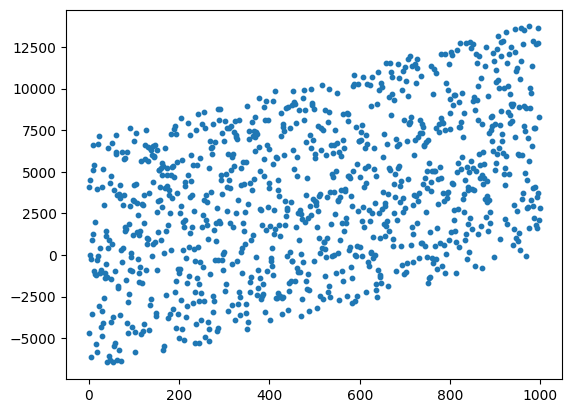

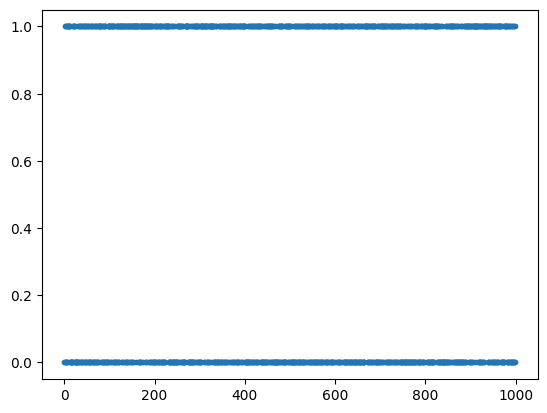

Positive target: 500
Negative target: 500


In [66]:
# Repeat the process for the first degree function
X, Y_class, R = regression_function()
print_function(X, R)
print_function(X, Y_class)

positive_target, negative_target = count_data(Y_class)
print(f'Positive target: {positive_target}')
print(f'Negative target: {negative_target}')

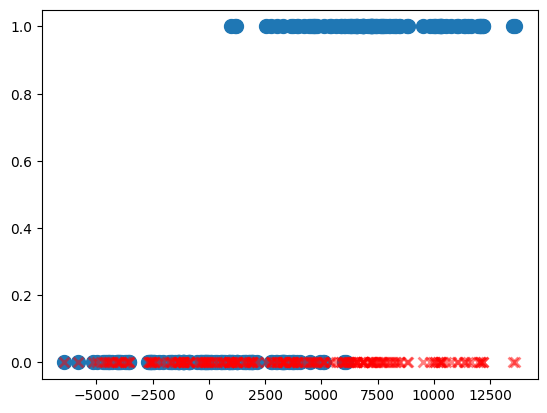

In [67]:
nn = NeuralNetwork()

# Separate data (80% train, 20% test)
X_train, X_test, Y_train, Y_test = train_test_split(R, Y_class, train_size=0.8)
Y_predicted = nn.predict(X_test)
print_prediction_function(X_test, Y_test, Y_predicted)

In [68]:
# Create training set in the format expected by the neural network
training_sample = [*zip(X_train, Y_train)]
learning_rate = 0.01
epochs = 1000
nn.train(training_sample, learning_rate, epochs)

Epoch: 0, Loss: 515.1833, Weight: 0.8416, Bias: -0.1482
Epoch: 100, Loss: 359.1472, Weight: 4.5927, Bias: -2.2453
Epoch: 200, Loss: 348.0598, Weight: 5.0823, Bias: -2.5005
Epoch: 300, Loss: 346.2799, Weight: 5.1679, Bias: -2.5451
Epoch: 400, Loss: 345.9597, Weight: 5.1836, Bias: -2.5533
Epoch: 500, Loss: 345.9009, Weight: 5.1864, Bias: -2.5548
Epoch: 600, Loss: 345.8900, Weight: 5.1870, Bias: -2.5551
Epoch: 700, Loss: 345.8881, Weight: 5.1871, Bias: -2.5551
Epoch: 800, Loss: 345.8877, Weight: 5.1871, Bias: -2.5551
Epoch: 900, Loss: 345.8876, Weight: 5.1871, Bias: -2.5551


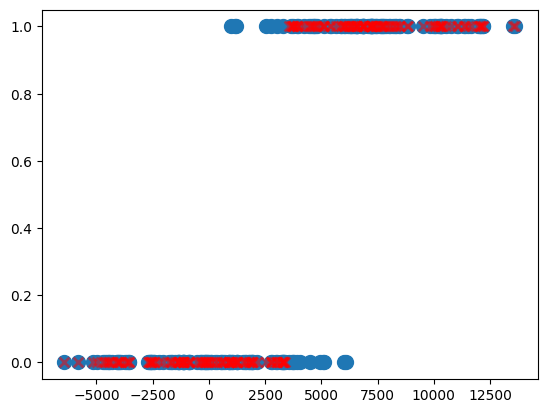

Positive train target: 405
Negative train target: 395
Positive test target: 95
Negative test target: 105
Positive predicted: 100
Negative predicted: 100


In [69]:
Y_predicted = nn.predict(X_test)
print_prediction_function(X_test, Y_test, Y_predicted)
positive_train_target, negative_train_target = count_data(Y_train)
positive_target, negative_target = count_data(Y_test)
positive_predicted, negative_predicted = count_data(Y_predicted)

print(f'Positive train target: {positive_train_target}')
print(f'Negative train target: {negative_train_target}')
print(f'Positive test target: {positive_target}')
print(f'Negative test target: {negative_target}')
print(f'Positive predicted: {positive_predicted}')
print(f'Negative predicted: {negative_predicted}')

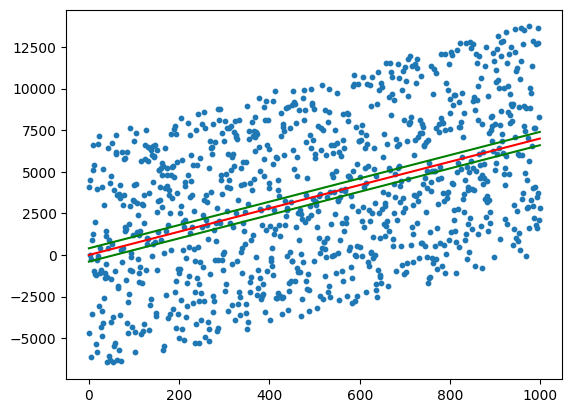

In [70]:
fig, ax = plt.subplots()
ax.scatter(X, R, s=10)
ax.plot(X, [7*x for x in X], color='red')
ax.plot(X, [7*x + 400 for x in X], color='green')
ax.plot(X, [7*x - 400 for x in X], color='green')
plt.show()